<a href="https://colab.research.google.com/github/palash04/Artificial-Intelligence/blob/master/NN_with_Keras/_03_MultiClass_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classifying newswires into 46 different topics.

In [1]:
import keras
keras.__version__

'2.4.3'

In [2]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


In [3]:
len(train_data)

8982

In [4]:
len(test_data)

2246

In [5]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [6]:
train_labels[10]

3

In [8]:
# vectroize the data
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [9]:
# vectorize the labels
# one-hot encoding
def one_hot_encode(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i,label] = 1.
  return results

one_hot_train_labels = one_hot_encode(train_labels)
one_hot_test_labels = one_hot_encode(test_labels)

In [11]:
# built-in way to do one hot encode in keras - 

from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [13]:
# Building our network
from keras import layers, models

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [15]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
# validating
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [17]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512,validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 77ms/step - loss: 2.3331 - accuracy: 0.5505 - val_loss: 1.5129 - val_accuracy: 0.6630
Epoch 2/20
16/16 [==============================] - 1s 65ms/step - loss: 1.1911 - accuracy: 0.7492 - val_loss: 1.1522 - val_accuracy: 0.7490
Epoch 3/20
16/16 [==============================] - 1s 65ms/step - loss: 0.8427 - accuracy: 0.8212 - val_loss: 1.0612 - val_accuracy: 0.7770
Epoch 4/20
16/16 [==============================] - 1s 64ms/step - loss: 0.6251 - accuracy: 0.8664 - val_loss: 0.9505 - val_accuracy: 0.8040
Epoch 5/20
16/16 [==============================] - 1s 64ms/step - loss: 0.4678 - accuracy: 0.9028 - val_loss: 0.9039 - val_accuracy: 0.8170
Epoch 6/20
16/16 [==============================] - 1s 64ms/step - loss: 0.3583 - accuracy: 0.9270 - val_loss: 0.8731 - val_accuracy: 0.8200
Epoch 7/20
16/16 [==============================] - 1s 65ms/step - loss: 0.2792 - accuracy: 0.9404 - val_loss: 0.8718 - val_accuracy: 0.8270
Epoch 8/20
16

In [19]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

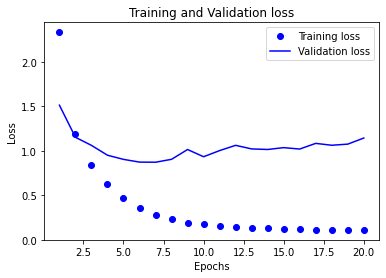

In [21]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

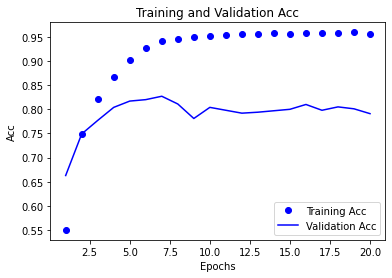

In [23]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Training and Validation Acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [25]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train, epochs=7, batch_size=512,validation_data=(x_val, y_val))

Epoch 1/7
16/16 [==============================] - 1s 71ms/step - loss: 2.3158 - accuracy: 0.5519 - val_loss: 1.4725 - val_accuracy: 0.6810
Epoch 2/7
16/16 [==============================] - 1s 65ms/step - loss: 1.2020 - accuracy: 0.7414 - val_loss: 1.1445 - val_accuracy: 0.7600
Epoch 3/7
16/16 [==============================] - 1s 65ms/step - loss: 0.8500 - accuracy: 0.8221 - val_loss: 1.0788 - val_accuracy: 0.7600
Epoch 4/7
16/16 [==============================] - 1s 65ms/step - loss: 0.6365 - accuracy: 0.8681 - val_loss: 0.9336 - val_accuracy: 0.8100
Epoch 5/7
16/16 [==============================] - 1s 65ms/step - loss: 0.4772 - accuracy: 0.9038 - val_loss: 0.8874 - val_accuracy: 0.8250
Epoch 6/7
16/16 [==============================] - 1s 64ms/step - loss: 0.3619 - accuracy: 0.9251 - val_loss: 0.8806 - val_accuracy: 0.8190
Epoch 7/7
16/16 [==============================] - 1s 64ms/step - loss: 0.2890 - accuracy: 0.9401 - val_loss: 0.8795 - val_accuracy: 0.8160


In [26]:
results = model.evaluate(x_test, one_hot_test_labels)

71/71 [==============================] - 0s 3ms/step - loss: 0.9711 - accuracy: 0.7885


In [27]:
#  generating predictions on new data
predictions = model.predict(x_test)

In [28]:
predictions.shape

(2246, 46)

In [31]:
predictions[0].argmax() # to which class does this belong to

3

In [33]:
one_hot_test_labels[0].argmax()

3

#### voila!!!